##### Importing the packages

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import re as re

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

###### Inserting the data

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

###### Descriptive analysis without visualizations

Let's look at the data first.

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


A lot of features can be classified based on the type of values they contain. 
* **Categorical features**: Survived, Sex, Embarked
* **Ordinal features**: Pclass
* **Continous numerical features**: Age, Fare
* **Discrete numerical features**: SibSp, Parch
* **Alphanumeric features**: Ticket, Cabin

###### Now we shall check for errors, typos, missing values or bad data in the sample 

In [6]:
train_df.info()
print('***'*20)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket 

We have a lot of missing values in both train and test datasets. 
  * **Age**: In the train dataset, 714/891 (80%) values are present while test dataset has 332/418 (79%) values.
  * **Cabin**: Train dataset has 204/891 (23%) values while test dataset has (22%) values.
  * **Embarked**: 2 values are missing in the train dataset while test dataset has no values missing.
  * **Fare**: Test dataset has 1 value missing.

These values need to be filled.

In [7]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


The name feature is a combination of a number of elements such as Title, Marriage name and Short name/Nickname. There are no missing values but the quotes can be considered as typos/errors. These need to be corrected.

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We have some interesting observations here. 
   * Looking at the minimum value of Age, we can conclude that passengers had new born babies with them. 
   * The sample has a list of families as well as unmarried passengers. When it comes to families, passengers were travelling with their spouses, children and even parents. 
   * Judging from the minimum fare value, it can be concluded that few passengers travelled for free. The fare ranges from 0 - 512.33.

In [9]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jensen, Mr. Hans Peder",male,CA. 2343,G6,S
freq,1,577,7,4,644


   * Most of the passengers were male (65%). 
   * There are 681 unique ticket numbers which means 210 tickets (23.5%) were same, this might be because passengers travelling together had same ticket numbers. 
   * There are many repetitions in Cabin values which points out to the fact that passengers shared cabins. 
   * Passengers embarking from Southampton were the highest.

### Data cleaning and Feature engineering

Before we proceed, we must keep in mind to apply every modification to both training and test dataset. 

In [10]:
full_data = [train_df, test_df]

##### PClass
There are no missing values and the values are numerical so we can check the impact of this feature on survival

In [11]:
print (train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


Looking at the values we see that 1st class passengers have the highest survival rate. We can also conclude that 1st class passengers might have been evacuated on priority.

##### Sex
Let's check the impact of sex on survival

In [12]:
print(train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


Females have a higher survival rate, this maybe because females are given priority during evacuation.

##### Age
Age has missing values so we need to fill them up first. We will fill the missing age values based on mean values of PClass and Sex. Once the missing values are filled, we shall divide the age groups into 5 categories to check its impact on survival.

In [13]:
def remove_na_ages(x):
    if pd.isnull(x['Age']):
        return mean_ages[x['Sex'],x['Pclass']]
    else:
        return x['Age']
for dataset in full_data:
    mean_ages = dataset.groupby(['Sex','Pclass'])['Age'].mean()
    dataset['Age'] =dataset.apply(remove_na_ages, axis=1)
    dataset['CategoricalAge']=pd.cut(dataset['Age'],5)
    
print(train_df[['CategoricalAge','Survived']].groupby(['CategoricalAge'],as_index=False).mean())
print('***'*20)
train_df.head(5)

     CategoricalAge  Survived
0    (0.34, 16.336]  0.550000
1  (16.336, 32.252]  0.336714
2  (32.252, 48.168]  0.412844
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909
************************************************************


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.252, 48.168]"


So what can we conclude from here? Children and Old aged passengers were rescued on priority. However, passengers who were very old (age > 64) had very less chances of survival, this maybe due to their health condition.

##### Family Size
Using SibSp and Parch, we will create a new feature "Family Size" and see its impact on survival.

In [14]:
for dataset in full_data:
    dataset['FamilySize']= dataset['SibSp'] + dataset['Parch'] +1
    
print(train_df[['FamilySize', 'Survived']].groupby(['FamilySize'],as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


We observe that having a smaller family size (<5) increases the chances of survival

##### IsAlone
Going further let's check if having a family has any impact on survival.

In [15]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


Chances of survival increases if family is involved.

##### Embarked
We have some missing values in Embarked feature. Let's fill them and then check its impact on survival.

In [16]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalAge,FamilySize,IsAlone
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,"(32.252, 48.168]",1,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,"(48.168, 64.084]",1,1


Both the passengers have some similarities: same PClass, Ticket Number and Fare. We can conclude that both might have embarked from the same port. 

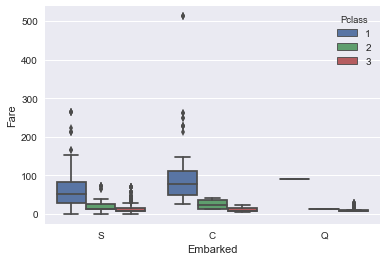

In [17]:
sns.boxplot(x='Embarked', y='Fare', hue= 'Pclass', data=train_df)

We have median of Embarked= C for Pclass 1 having fare $80. Therefore we will fill the missing values with Embarked = C

In [18]:
train_df['Embarked']= train_df['Embarked'].fillna('C')

Now to check the impact of Embarked feature on survival

In [19]:
print (train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.558824
1        Q  0.389610
2        S  0.336957


Passengers embarking for port C have the highest chances of survival.

##### Name
The Name features have a number of sub-features embedded in it. We will be deriving 2 new features using Names:
1. Title
2. Length of name

In [20]:
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""
for dataset in full_data:
    dataset['Title']=dataset['Name'].apply(get_title)

print(pd.crosstab(train_df['Title'],train_df['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [21]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
print(train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


So we can conclude that young females followed by young males have the highest chances of survival. The young ones were given priority during evacuation which can also be seen from the age feature.

In [22]:
for dataset in full_data:
    dataset['NameLength']= dataset['Name'].apply(lambda x: len(x))
##print(train_df[['NameLength','Survived']].groupby(['NameLength'],as_index=False).mean())

##### Fare
Let's slice up the Fare feature as well. Test dataset has a missing fare value so we need to fill that up first.

In [23]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train_df['Fare'].median())
train_df['CategoricalFare'] = pd.qcut(train_df['Fare'], 4)
print (train_df[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


##### Cabin
Now we get the cabin values for the passengers.

In [24]:
train_df['Deck']= train_df.Cabin.str[0]
test_df['Deck']=test_df.Cabin.str[0]
train_df['Deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [25]:
def extract_cabin(x):
    return x!=x and 'Z' or x[0]
for dataset in full_data:
    dataset['CabinLetter']= dataset['Cabin'].apply(extract_cabin)
#train_df.head(3)
#print('***'*20)
print(train_df['CabinLetter'].value_counts())

Z    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinLetter, dtype: int64


##### Ticket
Ticket has some valuable sub-features embedded in it but has too many unique values. For now, we will be excluding this feature for our analysis.

In [26]:
## Let's take a look at our dataset
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalAge,FamilySize,IsAlone,Title,NameLength,CategoricalFare,Deck,CabinLetter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 32.252]",2,0,Mr,23,"(-0.001, 7.91]",NaN,Z
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.252, 48.168]",2,0,Mrs,51,"(31.0, 512.329]",C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.336, 32.252]",1,1,Miss,22,"(7.91, 14.454]",NaN,Z
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.252, 48.168]",2,0,Mrs,44,"(31.0, 512.329]",C,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.252, 48.168]",1,1,Mr,24,"(7.91, 14.454]",NaN,Z


### Data Cleaning
First we convert all variables to numerical.

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelEnc = LabelEncoder()

cat_vars = ['Sex','Embarked','Title','CabinLetter']

for dataset in full_data:
    for col in cat_vars:
        dataset[col]= labelEnc.fit_transform(dataset[col])

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalAge,FamilySize,IsAlone,Title,NameLength,CategoricalFare,Deck,CabinLetter
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,"(16.336, 32.252]",2,0,2,23,"(-0.001, 7.91]",NaN,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,"(32.252, 48.168]",2,0,3,51,"(31.0, 512.329]",C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,"(16.336, 32.252]",1,1,1,22,"(7.91, 14.454]",NaN,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,"(32.252, 48.168]",2,0,3,44,"(31.0, 512.329]",C,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,"(32.252, 48.168]",1,1,2,24,"(7.91, 14.454]",NaN,8


In [28]:
for dataset in full_data:
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare']= 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']= 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare']= 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalAge,FamilySize,IsAlone,Title,NameLength,CategoricalFare,Deck,CabinLetter
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,2,"(16.336, 32.252]",2,0,2,23,"(-0.001, 7.91]",NaN,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,0,"(32.252, 48.168]",2,0,3,51,"(31.0, 512.329]",C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,2,"(16.336, 32.252]",1,1,1,22,"(7.91, 14.454]",NaN,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,C123,2,"(32.252, 48.168]",2,0,3,44,"(31.0, 512.329]",C,2
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,2,"(32.252, 48.168]",1,1,2,24,"(7.91, 14.454]",NaN,8


Now we drop features we dont require

In [29]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalAge,FamilySize,IsAlone,Title,NameLength,Deck,CabinLetter
0,892,3,"Kelly, Mr. James",1,2,0,0,330911,0,NaN,1,"(30.502, 45.668]",1,1,2,16,NaN,7
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2,1,0,363272,0,NaN,2,"(45.668, 60.834]",2,0,3,32,NaN,7
2,894,2,"Myles, Mr. Thomas Francis",1,3,0,0,240276,1,NaN,1,"(60.834, 76.0]",1,1,2,25,NaN,7
3,895,3,"Wirz, Mr. Albert",1,1,0,0,315154,1,NaN,2,"(15.336, 30.502]",1,1,2,16,NaN,7
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,1,3101298,1,NaN,2,"(15.336, 30.502]",3,0,3,44,NaN,7


In [30]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','Parch','CategoricalAge','Deck']
train_df = train_df.drop(drop_elements,axis=1)
test_df = test_df.drop(drop_elements,axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title,NameLength,CategoricalFare,CabinLetter
0,0,3,1,1,0,2,2,0,2,23,"(-0.001, 7.91]",8
1,1,1,0,2,3,0,2,0,3,51,"(31.0, 512.329]",2
2,1,3,0,1,1,2,1,1,1,22,"(7.91, 14.454]",8
3,1,1,0,2,3,2,2,0,3,44,"(31.0, 512.329]",2
4,0,3,1,2,1,2,1,1,2,24,"(7.91, 14.454]",8


In [31]:
train_df = train_df.drop(['CategoricalFare'], axis = 1)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title,NameLength,CabinLetter
0,0,3,1,1,0,2,2,0,2,23,8
1,1,1,0,2,3,0,2,0,3,51,2
2,1,3,0,1,1,2,1,1,1,22,8
3,1,1,0,2,3,2,2,0,3,44,2
4,0,3,1,2,1,2,1,1,2,24,8


##### Correlation of features
We check the correlation of features with the target

In [32]:
train_df.corr()['Survived']

Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.036384
Fare           0.295875
Embarked      -0.174199
FamilySize     0.016639
IsAlone       -0.203367
Title         -0.071174
NameLength     0.332350
CabinLetter   -0.301116
Name: Survived, dtype: float64

### Predictions

##### Defining the training and test sets

In [33]:
from sklearn.model_selection import train_test_split
X_all = train_df.drop('Survived',axis = 1)
Y_all = train_df['Survived']
num_test = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=num_test, random_state=23)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, Y_train)

predictions = clf.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.804469273743


##### Validating with K-Fold

In [35]:
from sklearn.cross_validation import KFold

def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        Y_train, Y_test = Y_all.values[train_index], Y_all.values[test_index]
        clf.fit(X_train, Y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(Y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

Fold 1 accuracy: 0.8111111111111111
Fold 2 accuracy: 0.8426966292134831
Fold 3 accuracy: 0.7640449438202247
Fold 4 accuracy: 0.8426966292134831
Fold 5 accuracy: 0.8539325842696629
Fold 6 accuracy: 0.8202247191011236
Fold 7 accuracy: 0.7865168539325843
Fold 8 accuracy: 0.7640449438202247
Fold 9 accuracy: 0.8764044943820225
Fold 10 accuracy: 0.797752808988764
Mean Accuracy: 0.8159425717852684


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
output = clf.predict(test_df).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('output.csv',index=False)